# Manim (optional)

**CS1302 Introduction to Computer Programming**
___

In [1]:
import math

from manim import *

%reload_ext mytutor

Manim Community v0.7.0

[Manim](https://github.com/3b1b/manim) is a powerful **anim**ation engine for **ma**themetics developed by [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw). We will use manim to domenstrate how object-oriented programming uses classes and objects to make it create complex animation.

## Creating a scene

**How to create an animation with `manim`?**

In jupyter notebook, we can use `%%manim` cell magic:

In [2]:
%%manim -qm --progress_bar=none --disable_caching --flush_cache -v ERROR HelloWorld
class HelloWorld(Scene):
    def construct(self):
        self.play(Write(Text("Hello, World!")))

In the line starting with `%%`:
- `-qm` is the alias for `--quality=m`, which means the video is rendered in medium quality. Change it to `-ql` (`-qh`) for low (high) quality.
- `--progress_bar=none --disable_caching --flush_cache -v ERROR` are [additional configurations](https://docs.manim.community/en/stable/tutorials/configuration.html) to turn off some features. 
- `HelloWorld` is the class to render, which is defined in the body:
    ```Python 
    class HelloWorld(Scene):
        def construct(self):
            ...
    ```

**How to define a class?**

As a toy example, the following [defines a class](https://docs.python.org/3/tutorial/classes.html?highlight=inheritance#class-definition-syntax) `Pet` and its [subclasses](https://docs.python.org/3/tutorial/classes.html?highlight=inheritance#inheritance) `Cat` and `Dog`:

In [3]:
%%mytutor -h 700
class Pet:
    kind = "Pet"

    def __init__(self, name):
        self.name = name

    def __str__(self):
        return f"{self.kind} {self.name}"


class Cat(Pet):
    kind = "Cat"


class Dog(Pet):
    kind = "Dog"


p1 = Pet("Alfie")
p2 = Dog("Bobbie")
p3, p4 = Cat("Bella"), Cat("Kelly")
print(p1, p2, p3, p4, sep=", ")

- Each pet has its own `name` but they share `kind` from their class without duplicating it.
- Subclasses can reuse (inherit) code from their superclass but produce different results:
    - Line 19-21 calls `Pet.__init__` implicitly to create pets with different `name`s.
    - Line 22 calls `Pet.__str__` implicitly to return a string containing pets' specific `kind` in addition to its `name`.

## Animating an Object

**How to add objects to a `Scene`?**

We can create a square and add it to the scene as follows:

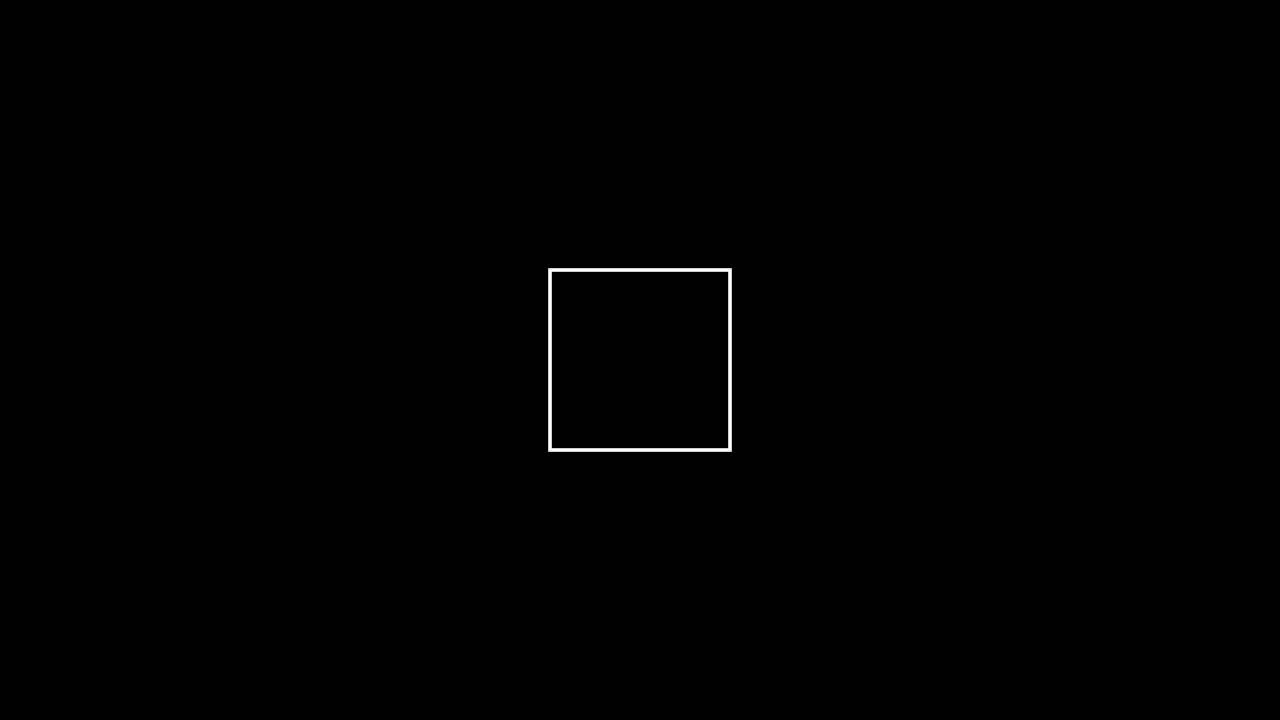

In [4]:
%%manim -qm --progress_bar=none --disable_caching --flush_cache -v ERROR BlueSquare1
class BlueSquare1(Scene):
    def construct(self):
        s = Square(fill_color=BLUE, color=WHITE)
        self.add(s)

- The square object is create using `Square`, `BLUE` and `WHITE` imported from `manim`.
- It is then placed to to the scene using `self.add` inherited from `Scene`.

**How to animate an object?**

The following shows the creation of a square:

In [5]:
%%manim -qm --progress_bar=none --disable_caching --flush_cache -v ERROR BlueSquare2
class BlueSquare2(Scene):
    def construct(self):
        s = Square(color=WHITE, fill_color=BLUE, fill_opacity=0.8)
        self.play(Create(s))
        self.wait()

- `self.play` plays the animation `Create(s)`.
- `self.wait()` creates a pause "animation".

**How to transform an object?**

To scale, move, or rotate the shape:

In [6]:
%%manim -qm --progress_bar=none --disable_caching --flush_cache -v ERROR BlueSquare3
class BlueSquare3(Scene):
    def construct(self):
        s = Square(color=WHITE, fill_color=BLUE, fill_opacity=0.8)
        self.play(Create(s))
        self.play(s.animate.scale(1.5).rotate(PI / 4))
        self.play(s.animate.move_to([-3, 0, 0]))
        self.play(s.animate.move_to([3, 0, 0]))
        self.play(s.animate.scale(0.5).move_to(ORIGIN).rotate(-PI / 4))
        self.wait()

**Exercise** (Optional) The attribute `s.animate` is an object that provides the methods `scale`, `move_to`, and `rotate`. Note that the methods can be called successively as in `s.animate.scale(0.5).move_to(ORIGIN).rotate(-PI/4)`. Why?

## Animating multiple objects

**Tessellation with regular polygons**

Consider tiling a 12-by-6 plane using squares:

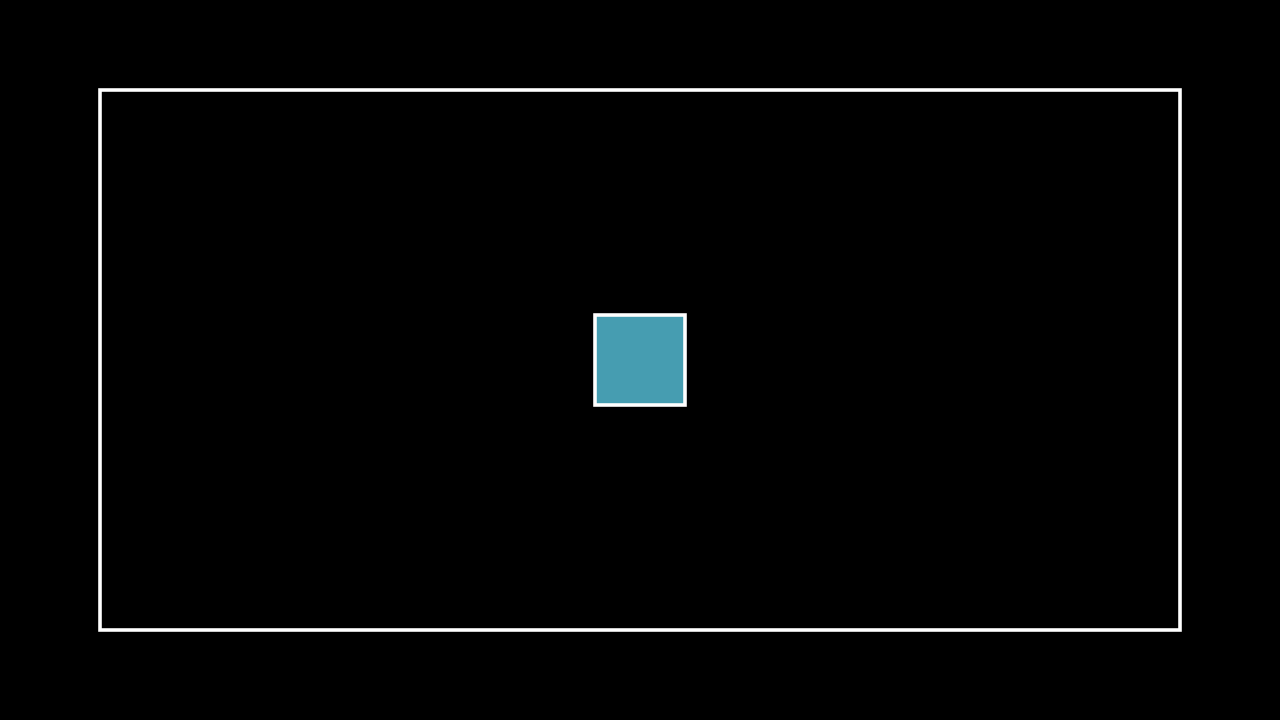

In [7]:
%%manim -qm --progress_bar=none --disable_caching --flush_cache -v ERROR SquareTiling1
class SquareTiling1(Scene):
    WIDTH = 12
    HEIGHT = 6
    EDGE = 1

    def construct(self):
        plane = Rectangle(width=self.WIDTH, height=self.HEIGHT)
        unit = Square(color=WHITE, fill_color=BLUE, fill_opacity=0.8).scale(
            self.EDGE / 2
        )
        self.add(plane, unit)

The first line of squares can be animated as follows:

In [8]:
%%manim -qm --progress_bar=none --disable_caching --flush_cache -v ERROR SquareTiling2
class SquareTiling2(Scene):
    WIDTH = 12
    HEIGHT = 6
    EDGE = 1

    def construct(self):

        plane = Rectangle(width=self.WIDTH, height=self.HEIGHT)
        self.add(plane)

        unit = Square(color=WHITE, fill_color=BLUE, fill_opacity=0.8).scale(
            self.EDGE / 2
        )
        self.play(Create(unit))
        self.play(
            unit.animate.move_to(
                [-self.WIDTH / 2 + self.EDGE / 2, self.HEIGHT / 2 - self.EDGE / 2, 0]
            )
        )

        for i in range(1, self.WIDTH // self.EDGE):
            self.play(unit.copy().animate.shift([i, 0, 0]), run_time=1 / i)
        self.wait()

We can use `VGroup` method to create a group of shapes.

In [9]:
%%manim -qm --progress_bar=none --disable_caching --flush_cache -v ERROR SquareTiling3
class SquareTiling3(Scene):
    WIDTH = 12
    HEIGHT = 6
    EDGE = 1

    def construct(self):

        plane = Rectangle(width=self.WIDTH, height=self.HEIGHT)
        self.add(plane)

        unit = Square(color=WHITE, fill_color=BLUE, fill_opacity=0.8).scale(
            self.EDGE / 2
        )
        self.play(Create(unit))
        self.play(
            unit.animate.move_to(
                [-self.WIDTH / 2 + self.EDGE / 2, self.HEIGHT / 2 - self.EDGE / 2, 0]
            )
        )

        for i in range(1, math.floor(self.WIDTH / self.EDGE)):
            self.play(unit.copy().animate.shift([i * self.EDGE, 0, 0]), run_time=1 / i)

        line = VGroup(
            *[
                unit.copy().shift([i * self.EDGE, 0, 0])
                for i in range(math.floor(self.WIDTH / self.EDGE))
            ]
        )
        for i in range(1, math.floor(self.HEIGHT / self.EDGE)):
            self.play(line.copy().animate.shift([0, -i * self.EDGE, 0]), run_time=1 / i)

        self.wait()

**Exercise** (Optional) Use manim to show the other two ways of tiling with regular polygons (triangle and hexagon). (see [tiling with regular polygons](https://en.wikipedia.org/wiki/Euclidean_tilings_by_convex_regular_polygons))